<a href="https://colab.research.google.com/github/harshathghara/Internpe/blob/main/iplwinningteamprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [ ]:
match.head()

id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [ ]:
match.shape

(756, 18)

In [ ]:
delivery.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

<ipython-input-11-40e5f6bc616a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df

match_id  inning  total_runs
0            1       1         207
2            2       1         184
4            3       1         183
6            4       1         163
8            5       1         157
...        ...     ...         ...
1518     11347       1         143
1520     11412       1         136
1522     11413       1         171
1524     11414       1         155
1526     11415       1         152

[756 rows x 3 columns]

from matplotlib import pyplot as plt
total_score_df['match_id'].plot(kind='hist', bins=20, title='match_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_score_df['total_runs'].plot(kind='hist', bins=20, title='total_runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_score_df.plot(kind='scatter', x='match_id', y='total_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['total_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('total_runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['match_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'match_id'}, axis=1)
              .sort_values('match_id', ascending=True))
  xs = counted['match_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['inning']
  ys = series['total_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('inning', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('inning')
_ = plt.ylabel('total_runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['inning']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'inning'}, axis=1)
              .sort_values('inning', ascending=True))
  xs = counted['inning']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('inning', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('inning')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
total_score_df['match_id'].plot(kind='line', figsize=(8, 4), title='match_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
total_score_df['total_runs'].plot(kind='line', figsize=(8, 4), title='total_runs')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

id    Season           city        date                        team1  \
0        1  IPL-2017      Hyderabad  05-04-2017          Sunrisers Hyderabad   
1        2  IPL-2017           Pune  06-04-2017               Mumbai Indians   
2        3  IPL-2017         Rajkot  07-04-2017                Gujarat Lions   
3        4  IPL-2017         Indore  08-04-2017       Rising Pune Supergiant   
4        5  IPL-2017      Bangalore  08-04-2017  Royal Challengers Bangalore   
..     ...       ...            ...         ...                          ...   
751  11347  IPL-2019         Mumbai  05-05-2019        Kolkata Knight Riders   
752  11412  IPL-2019        Chennai  07-05-2019          Chennai Super Kings   
753  11413  IPL-2019  Visakhapatnam  08-05-2019          Sunrisers Hyderabad   
754  11414  IPL-2019  Visakhapatnam  10-05-2019               Delhi Capitals   
755  11415  IPL-2019      Hyderabad  12-05-2019               Mumbai Indians   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
751               Mumbai Indians               Mumbai Indians         field   
752               Mumbai Indians          Chennai Super Kings           bat   
753               Delhi Capitals               Delhi Capitals         field   
754          Chennai Super Kings          Chennai Super Kings         field   
755          Chennai Super Kings               Mumbai Indians           bat   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
1    normal           0       Rising Pune Supergiant            0   
2    normal           0        Kolkata Knight Riders            0   
3    normal           0              Kings XI Punjab            0   
4    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
751  normal           0               Mumbai Indians            0   
752  normal           0               Mumbai Indians            0   
753  normal           0               Delhi Capitals            0   
754  normal           0          Chennai Super Kings            0   
755  normal           0               Mumbai Indians            1   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
751               9       HH Pandya   
752               6        AS Yadav   
753               2         RR Pant   
754               6    F du Plessis   
755               0       JJ Bumrah   

                                         venue         umpire1  \
0    Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1      Maharashtra Cricket Association Stadium  A Nand Kishore   
2       Saurashtra Cricket Association Stadium     Nitin Menon   
3                       Holkar Cricket Stadium    AK Chaudhary   
4                        M Chinnaswamy Stadium             NaN   
..                                         ...             ...   
751                           Wankhede Stadium   Nanda Kishore   
752                  M. A. Chidambaram Stadium     Nigel Llong   
753                           ACA-VDCA Stadium             NaN   
754                           ACA-VDCA Stadium   Sundaram Ravi   
755         Rajiv Gandhi Intl. Cricket Stadium     Nitin Menon   

       

from matplotlib import pyplot as plt
match_df['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
match_df['dl_applied'].plot(kind='hist', bins=20, title='dl_applied')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
match_df['win_by_runs'].plot(kind='hist', bins=20, title='win_by_runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
match_df['win_by_wickets'].plot(kind='hist', bins=20, title='win_by_wickets')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
match_df.groupby('toss_decision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
match_df.groupby('result').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
match_df.plot(kind='scatter', x='id', y='dl_applied', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
match_df.plot(kind='scatter', x='dl_applied', y='win_by_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
match_df.plot(kind='scatter', x='win_by_runs', y='win_by_wickets', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
match_df.plot(kind='scatter', x='win_by_wickets', y='match_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['dl_applied']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = match_df.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('toss_decision')):
  _plot_series(series, series_name, i)
  fig.legend(title='toss_decision', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('dl_applied')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['dl_applied']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = match_df.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('result')):
  _plot_series(series, series_name, i)
  fig.legend(title='result', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('dl_applied')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['win_by_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = match_df.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('toss_decision')):
  _plot_series(series, series_name, i)
  fig.legend(title='toss_decision', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('win_by_runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['win_by_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = match_df.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('result')):
  _plot_series(series, series_name, i)
  fig.legend(title='result', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('win_by_runs')

from matplotlib import pyplot as plt
match_df['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
match_df['dl_applied'].plot(kind='line', figsize=(8, 4), title='dl_applied')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
match_df['win_by_runs'].plot(kind='line', figsize=(8, 4), title='win_by_runs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
match_df['win_by_wickets'].plot(kind='line', figsize=(8, 4), title='win_by_wickets')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['result'].value_counts()
    for x_label, grp in match_df.groupby('toss_decision')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('toss_decision')
_ = plt.ylabel('result')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(match_df['toss_decision'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(match_df, x='id', y='toss_decision', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(match_df['result'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(match_df, x='id', y='result', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(match_df['toss_decision'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(match_df, x='dl_applied', y='toss_decision', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(match_df['result'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(match_df, x='dl_applied', y='result', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(641, 20)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           207       2   
126            1  Hyderabad  Sunrisers Hyderabad           207       2   
127            1  Hyderabad  Sunrisers Hyderabad           207       2   
128            1  Hyderabad  Sunrisers Hyderabad           207       2   
129            1  Hyderabad  Sunrisers Hyderabad           207       2   
...          ...        ...                  ...           ...     ...   
149573     11415  Hyderabad       Mumbai Indians           152       2   
149574     11415  Hyderabad       Mumbai Indians           152       2   
149575     11415  Hyderabad       Mumbai Indians           152       2   
149576     11415  Hyderabad       Mumbai Indians           152       2   
149577     11415  Hyderabad       Mumbai Indians           152       2   

                       batting_team         bowling_team  over  ball  \
125     Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126     Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127     Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128     Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129     Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                             ...                  ...   ...   ...   
149573          Chennai Super Kings       Mumbai Indians    20     2   
149574          Chennai Super Kings       Mumbai Indians    20     3   
149575          Chennai Super Kings       Mumbai Indians    20     4   
149576          Chennai Super Kings       Mumbai Indians    20     5   
149577          Chennai Super Kings       Mumbai Indians    20     6   

              batsman  ... bye_runs legbye_runs  noball_runs  penalty_runs  \
125          CH Gayle  ...        0           0            0             0   
126     Mandeep Singh  ...        0           0            0             0   
127     Mandeep Singh  ...        0           0            0             0   
128     Mandeep Singh  ...        0           0            0             0   
129     Mandeep Singh  ...        0           0            0             0   
...               ...  ...      ...         ...          ...           ...   
149573      RA Jadeja  ...        0           0            0             0   
149574      SR Watson  ...        0           0            0             0   
149575      SR Watson  ...        0           0            0             0   
149576      SN Thakur  ...        0           0            0             0   
149577      SN Thakur  ...        0           0            0             0   

        batsman_runs  extra_runs  total_runs_y  player_dismissed  \
125                1           0             1               NaN   
126                0           0             0               NaN   
127                0           0             0               NaN   
128                2           0             2               NaN   
129                4           0             4               NaN   
...              ...         ...           ...               ...   
149573             1           0             1               NaN   
149574             2           0             2               NaN   
149575             1           0             1         SR Watson   
149576             2           0             2               NaN   
149577             0           0             0         SN Thakur   

        dismissal_kind    fielder  
125                NaN        NaN  
126                NaN        NaN  
127                NaN        NaN  
128                NaN        NaN  
129                NaN        NaN  
...                ...        ...  
149573             NaN        NaN  
149574             NaN        NaN  
149575         run out  KH Pandya  
149576             NaN        NaN  
149577             lbw        NaN  

[72413 rows x 24 columns]

from matplotlib import pyplot as plt
delivery_df['match_id'].plot(kind='hist', bins=20, title='match_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['total_runs_x'].plot(kind='hist', bins=20, title='total_runs_x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['over'].plot(kind='hist', bins=20, title='over')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['ball'].plot(kind='hist', bins=20, title='ball')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df.plot(kind='scatter', x='match_id', y='total_runs_x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df.plot(kind='scatter', x='total_runs_x', y='over', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df.plot(kind='scatter', x='over', y='ball', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df.plot(kind='scatter', x='ball', y='wide_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['total_runs_x']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = delivery_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('total_runs_x')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['over']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = delivery_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('over')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['ball']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = delivery_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('ball')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['wide_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = delivery_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('wide_runs')

from matplotlib import pyplot as plt
delivery_df['match_id'].plot(kind='line', figsize=(8, 4), title='match_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['total_runs_x'].plot(kind='line', figsize=(8, 4), title='total_runs_x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['over'].plot(kind='line', figsize=(8, 4), title='over')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['ball'].plot(kind='line', figsize=(8, 4), title='ball')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-27-cafdf4636499>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           207       2   
126            1  Hyderabad  Sunrisers Hyderabad           207       2   
127            1  Hyderabad  Sunrisers Hyderabad           207       2   
128            1  Hyderabad  Sunrisers Hyderabad           207       2   
129            1  Hyderabad  Sunrisers Hyderabad           207       2   
...          ...        ...                  ...           ...     ...   
149573     11415  Hyderabad       Mumbai Indians           152       2   
149574     11415  Hyderabad       Mumbai Indians           152       2   
149575     11415  Hyderabad       Mumbai Indians           152       2   
149576     11415  Hyderabad       Mumbai Indians           152       2   
149577     11415  Hyderabad       Mumbai Indians           152       2   

                       batting_team         bowling_team  over  ball  \
125     Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126     Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127     Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128     Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129     Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                             ...                  ...   ...   ...   
149573          Chennai Super Kings       Mumbai Indians    20     2   
149574          Chennai Super Kings       Mumbai Indians    20     3   
149575          Chennai Super Kings       Mumbai Indians    20     4   
149576          Chennai Super Kings       Mumbai Indians    20     5   
149577          Chennai Super Kings       Mumbai Indians    20     6   

              batsman  ... penalty_runs batsman_runs  extra_runs  \
125          CH Gayle  ...            0            1           0   
126     Mandeep Singh  ...            0            0           0   
127     Mandeep Singh  ...            0            0           0   
128     Mandeep Singh  ...            0            2           0   
129     Mandeep Singh  ...            0            4           0   
...               ...  ...          ...          ...         ...   
149573      RA Jadeja  ...            0            1           0   
149574      SR Watson  ...            0            2           0   
149575      SR Watson  ...            0            1           0   
149576      SN Thakur  ...            0            2           0   
149577      SN Thakur  ...            0            0           0   

        total_runs_y  player_dismissed  dismissal_kind    fielder  \
125                1               NaN             NaN        NaN   
126                0               NaN             NaN        NaN   
127                0               NaN             NaN        NaN   
128                2               NaN             NaN        NaN   
129                4               NaN             NaN        NaN   
...              ...               ...             ...        ...   
149573             1               NaN             NaN        NaN   
149574             2               NaN             NaN        NaN   
149575             1         SR Watson         run out  KH Pandya   
149576             2               NaN             NaN        NaN   
149577             0         SN Thakur             lbw        NaN   

        current_score  runs_left  balls_left  
125                 1        206         119  
126                 1        206         118  
127                 1        206         117  
128                 3        204         116  
129                 7        200         115  
...               ...        ...         ...  
149573            152          0           4  
149574            154         -2           3  
149575            155         -3           2  
149576            157         -5           1  
149577            157         -5           0  

[72413 rows x 27 columns]

from matplotlib import pyplot as plt
delivery_df['match_id'].plot(kind='hist', bins=20, title='match_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['total_runs_x'].plot(kind='hist', bins=20, title='total_runs_x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['over'].plot(kind='hist', bins=20, title='over')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['ball'].plot(kind='hist', bins=20, title='ball')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df.plot(kind='scatter', x='match_id', y='total_runs_x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df.plot(kind='scatter', x='total_runs_x', y='over', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df.plot(kind='scatter', x='over', y='ball', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
delivery_df.plot(kind='scatter', x='ball', y='wide_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['total_runs_x']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = delivery_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('total_runs_x')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['over']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = delivery_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('over')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['ball']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = delivery_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('ball')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['wide_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = delivery_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('wide_runs')

from matplotlib import pyplot as plt
delivery_df['match_id'].plot(kind='line', figsize=(8, 4), title='match_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['total_runs_x'].plot(kind='line', figsize=(8, 4), title='total_runs_x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['over'].plot(kind='line', figsize=(8, 4), title='over')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
delivery_df['ball'].plot(kind='line', figsize=(8, 4), title='ball')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

<ipython-input-32-5cbb94c1e6d2>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   
127         1  Hyderabad  Sunrisers Hyderabad           207       2   
128         1  Hyderabad  Sunrisers Hyderabad           207       2   
129         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127  Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128  Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129  Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   

           batsman  ... batsman_runs extra_runs  total_runs_y  \
125       CH Gayle  ...            1          0             1   
126  Mandeep Singh  ...            0          0             0   
127  Mandeep Singh  ...            0          0             0   
128  Mandeep Singh  ...            2          0             2   
129  Mandeep Singh  ...            4          0             4   

     player_dismissed  dismissal_kind  fielder  current_score  runs_left  \
125                 1             NaN      NaN              1        206   
126                 1             NaN      NaN              1        206   
127                 1             NaN      NaN              1        206   
128                 1             NaN      NaN              3        204   
129                 1             NaN      NaN              7        200   

     balls_left  wickets  
125         119        9  
126         118        8  
127         117        7  
128         116        6  
129         115        5  

[5 rows x 28 columns]

from matplotlib import pyplot as plt
_df_23['ball'].plot(kind='hist', bins=20, title='ball')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['batsman_runs'].plot(kind='hist', bins=20, title='batsman_runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['total_runs_y'].plot(kind='hist', bins=20, title='total_runs_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['current_score'].plot(kind='hist', bins=20, title='current_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('batsman').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('non_striker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='ball', y='batsman_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='batsman_runs', y='total_runs_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='total_runs_y', y='current_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='current_score', y='runs_left', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['batsman_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('match_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('batsman')):
  _plot_series(series, series_name, i)
  fig.legend(title='batsman', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('batsman_runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['batsman_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_34.sort_values('match_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('non_striker')):
  _plot_series(series, series_name, i)
  fig.legend(title='non_striker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('batsman_runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['total_runs_y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_35.sort_values('match_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('batsman')):
  _plot_series(series, series_name, i)
  fig.legend(title='batsman', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('total_runs_y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['total_runs_y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('match_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('non_striker')):
  _plot_series(series, series_name, i)
  fig.legend(title='non_striker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('total_runs_y')

from matplotlib import pyplot as plt
_df_37['ball'].plot(kind='line', figsize=(8, 4), title='ball')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['batsman_runs'].plot(kind='line', figsize=(8, 4), title='batsman_runs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_39['total_runs_y'].plot(kind='line', figsize=(8, 4), title='total_runs_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['current_score'].plot(kind='line', figsize=(8, 4), title='current_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['non_striker'].value_counts()
    for x_label, grp in _df_41.groupby('batsman')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('batsman')
_ = plt.ylabel('non_striker')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_42['batsman'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_42, x='ball', y='batsman', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['non_striker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='ball', y='non_striker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['batsman'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='batsman_runs', y='batsman', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['non_striker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='batsman_runs', y='non_striker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
delivery_df.head()

match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   
127         1  Hyderabad  Sunrisers Hyderabad           207       2   
128         1  Hyderabad  Sunrisers Hyderabad           207       2   
129         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127  Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128  Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129  Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   

           batsman  ... batsman_runs extra_runs  total_runs_y  \
125       CH Gayle  ...            1          0             1   
126  Mandeep Singh  ...            0          0             0   
127  Mandeep Singh  ...            0          0             0   
128  Mandeep Singh  ...            2          0             2   
129  Mandeep Singh  ...            4          0             4   

     player_dismissed  dismissal_kind  fielder  current_score  runs_left  \
125                 1             NaN      NaN              1        206   
126                 1             NaN      NaN              1        206   
127                 1             NaN      NaN              1        206   
128                 1             NaN      NaN              3        204   
129                 1             NaN      NaN              7        200   

     balls_left  wickets  
125         119        9  
126         118        8  
127         117        7  
128         116        6  
129         115        5  

[5 rows x 28 columns]

from matplotlib import pyplot as plt
_df_46['ball'].plot(kind='hist', bins=20, title='ball')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47['batsman_runs'].plot(kind='hist', bins=20, title='batsman_runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['total_runs_y'].plot(kind='hist', bins=20, title='total_runs_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['current_score'].plot(kind='hist', bins=20, title='current_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_50.groupby('batsman').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_51.groupby('non_striker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='ball', y='batsman_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='batsman_runs', y='total_runs_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54.plot(kind='scatter', x='total_runs_y', y='current_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55.plot(kind='scatter', x='current_score', y='runs_left', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['batsman_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('match_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('batsman')):
  _plot_series(series, series_name, i)
  fig.legend(title='batsman', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('batsman_runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['batsman_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_57.sort_values('match_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('non_striker')):
  _plot_series(series, series_name, i)
  fig.legend(title='non_striker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('batsman_runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['total_runs_y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_58.sort_values('match_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('batsman')):
  _plot_series(series, series_name, i)
  fig.legend(title='batsman', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('total_runs_y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['total_runs_y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_59.sort_values('match_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('non_striker')):
  _plot_series(series, series_name, i)
  fig.legend(title='non_striker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('total_runs_y')

from matplotlib import pyplot as plt
_df_60['ball'].plot(kind='line', figsize=(8, 4), title='ball')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['batsman_runs'].plot(kind='line', figsize=(8, 4), title='batsman_runs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62['total_runs_y'].plot(kind='line', figsize=(8, 4), title='total_runs_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_63['current_score'].plot(kind='line', figsize=(8, 4), title='current_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['non_striker'].value_counts()
    for x_label, grp in _df_64.groupby('batsman')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('batsman')
_ = plt.ylabel('non_striker')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_65['batsman'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_65, x='ball', y='batsman', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_66['non_striker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_66, x='ball', y='non_striker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_67['batsman'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_67, x='batsman_runs', y='batsman', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_68['non_striker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_68, x='batsman_runs', y='non_striker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

batting_team    bowling_team       city  runs_left  balls_left  \
142524  Sunrisers Hyderabad  Delhi Capitals  Hyderabad         55          22   

        wickets  total_runs_x       crr   rrr  result  
142524      -91           164  6.673469  15.0       0

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

batting_team         bowling_team          city  \
142997             Rajasthan Royals      Kings XI Punjab        Mohali   
130661        Kolkata Knight Riders       Mumbai Indians       Kolkata   
143461               Delhi Capitals       Mumbai Indians         Delhi   
85174                Mumbai Indians      Kings XI Punjab    Dharamsala   
130852          Sunrisers Hyderabad     Delhi Daredevils         Delhi   
...                             ...                  ...           ...   
144190               Delhi Capitals      Kings XI Punjab         Delhi   
33067   Royal Challengers Bangalore  Chennai Super Kings  Johannesburg   
114008          Chennai Super Kings       Mumbai Indians       Kolkata   
3757          Kolkata Knight Riders     Delhi Daredevils       Kolkata   
103845          Chennai Super Kings       Mumbai Indians        Mumbai   

        runs_left  balls_left  wickets  total_runs_x        crr        rrr  
142997         62          31      -83           190   8.629213  12.000000  
130661        140          53      -57           217   6.895522  15.849057  
143461         99          42      -70           174   5.769231  14.142857  
85174         156          97      -13           183   7.043478   9.649485  
130852        156          92      -18           190   7.285714  10.173913  
...           ...         ...      ...           ...        ...        ...  
144190         67          53      -61           168   9.044776   7.584906  
33067          17          15      -96           146   7.371429   6.800000  
114008        150          70      -41           202   6.240000  12.857143  
3757           58          59      -51           160  10.032787   5.898305  
103845        103          88      -26           183  15.000000   7.022727  

[57073 rows x 9 columns]

from matplotlib import pyplot as plt
X_train['runs_left'].plot(kind='hist', bins=20, title='runs_left')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['balls_left'].plot(kind='hist', bins=20, title='balls_left')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['wickets'].plot(kind='hist', bins=20, title='wickets')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['total_runs_x'].plot(kind='hist', bins=20, title='total_runs_x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='runs_left', y='balls_left', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='balls_left', y='wickets', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='wickets', y='total_runs_x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='total_runs_x', y='crr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['runs_left'].plot(kind='line', figsize=(8, 4), title='runs_left')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['balls_left'].plot(kind='line', figsize=(8, 4), title='balls_left')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['wickets'].plot(kind='line', figsize=(8, 4), title='wickets')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['total_runs_x'].plot(kind='line', figsize=(8, 4), title='total_runs_x')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7909454061251664

In [ ]:
pipe.predict_proba(X_test)[10]

array([0.86875497, 0.13124503])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [ ]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


end_of_over  runs_after_over  wickets_in_over  lose   win
10459            1                4                6  61.7  38.3
10467            2                8                8  61.7  38.3
10473            3                1                6  74.2  25.8
10479            4                7                6  74.9  25.1
10485            5               12                6  67.2  32.8
10491            6               13                6  56.8  43.2
10497            7                9                6  54.4  45.6
10505            8               15                8  41.7  58.3
10511            9                7                6  43.5  56.5
10518           10               17                7  27.1  72.9
10524           11                9                6  25.2  74.8
10530           12                9                6  23.3  76.7
10536           13                8                6  23.0  77.0
10542           14                8                6  22.7  77.3
10548           15                5                6  27.8  72.2
10555           16                8                7  28.8  71.2
10561           17                8                6  29.4  70.6
10567           18                6                6  36.4  63.6
10573           19                8                6  45.5  54.5

from matplotlib import pyplot as plt
temp_df['end_of_over'].plot(kind='hist', bins=20, title='end_of_over')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df['runs_after_over'].plot(kind='hist', bins=20, title='runs_after_over')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df['wickets_in_over'].plot(kind='hist', bins=20, title='wickets_in_over')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df['lose'].plot(kind='hist', bins=20, title='lose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df.plot(kind='scatter', x='end_of_over', y='runs_after_over', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df.plot(kind='scatter', x='runs_after_over', y='wickets_in_over', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df.plot(kind='scatter', x='wickets_in_over', y='lose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df.plot(kind='scatter', x='lose', y='win', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['end_of_over']
  ys = series['runs_after_over']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp_df.sort_values('end_of_over', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('end_of_over')
_ = plt.ylabel('runs_after_over')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['end_of_over']
  ys = series['wickets_in_over']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp_df.sort_values('end_of_over', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('end_of_over')
_ = plt.ylabel('wickets_in_over')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['end_of_over']
  ys = series['lose']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp_df.sort_values('end_of_over', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('end_of_over')
_ = plt.ylabel('lose')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['end_of_over']
  ys = series['win']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp_df.sort_values('end_of_over', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('end_of_over')
_ = plt.ylabel('win')

from matplotlib import pyplot as plt
temp_df['end_of_over'].plot(kind='line', figsize=(8, 4), title='end_of_over')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
temp_df['runs_after_over'].plot(kind='line', figsize=(8, 4), title='runs_after_over')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
temp_df['wickets_in_over'].plot(kind='line', figsize=(8, 4), title='wickets_in_over')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
temp_df['lose'].plot(kind='line', figsize=(8, 4), title='lose')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Target-178')

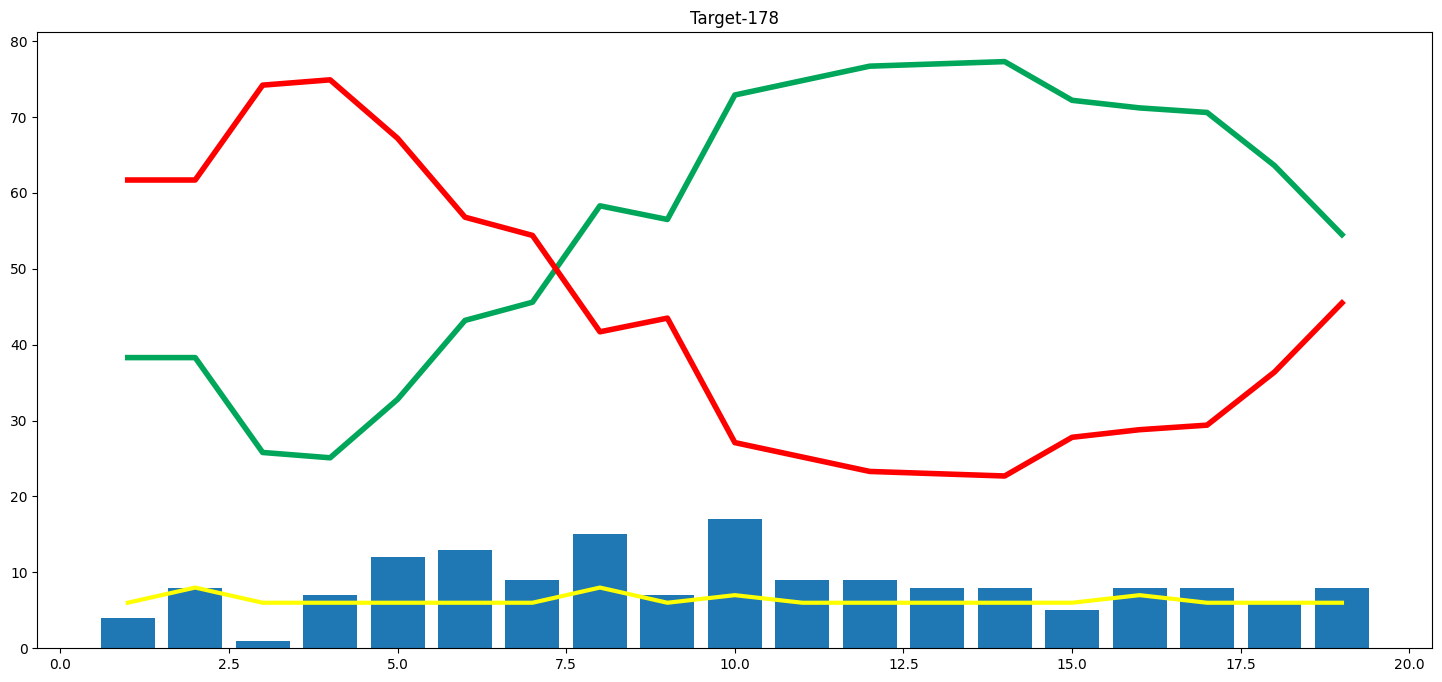

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [ ]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))